<a href="https://colab.research.google.com/github/patrickdevv/FIAP_Fase01_Desafio/blob/main/Desafio_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Pós-Tech - IA para Devs - Fase 01**

Carregar as libs para utilizar no notebook

In [37]:
# Importações
from datetime import datetime as dt

from pandas import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

**Carregar a base de dados, obtida do kaggle, e armazenada no github**

In [38]:
# Carregar Dados do GitHub
# URL do link bruto do arquivo no GitHub
url = 'https://raw.githubusercontent.com/edumarcelino/dataset/main/insurance.csv'

# Tentar carregar o DataFrame
try:
    df = pd.read_csv(url)
    print("DataFrame carregado com sucesso!")
    print(df.head())
except Exception as e:
    print(f"Erro ao carregar o DataFrame: {e}")

DataFrame carregado com sucesso!
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


**Carregar um dataset complementar para enriquecer os dados**

In [39]:
# Carregar Dados do GitHub
# URL do link bruto do arquivo no GitHub
url_us_income_zipcode = 'https://raw.githubusercontent.com/edumarcelino/dataset/main/us_income_zipcode.csv'


# Tentar carregar o DataFrame
try:
    df_us_income_zipcode = pd.read_csv(url_us_income_zipcode)
    print("DataFrame carregado com sucesso!")
    print(df_us_income_zipcode.head())
except Exception as e:
    print(f"Erro ao carregar o DataFrame: {e}")

Erro ao carregar o DataFrame: No columns to parse from file


**Verificar se existem missing values no dataset**

In [40]:
# Verificar valores ausentes
missing_values = df.isnull().sum()
print("Quantidade de Missing Values por coluna:\n \n", missing_values)

Quantidade de Missing Values por coluna:
 
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


**Função que gera a categoria de idade**

In [41]:
# Função para categorizar idade em inglês
def age_category(age):
    if age <= 12:
        return 'Child'
    elif age <= 19:
        return 'Teenager'
    elif age <= 34:
        return 'Young Adult'
    elif age <= 64:
        return 'Adult'
    else:
        return 'Senior'

**Gerar variaveis categorica e numerica**

In [42]:
# Aplicar a função ao DataFrame para gerar a variavel categorica age_category
df['age_category'] = df['age'].apply(age_category)

# Criar a variável com a quantidade de pessoas no plano
df['number_people_on_plan'] = df['children'] + 1


##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

,0
age,int64
sex,category
bmi,float64
children,int64
smoker,category
region,category
charges,float64
age_category,object
number_people_on_plan,int64


**Visualizando as caracteristicas descritivas**

In [43]:
# Estatísticas descritivas
desc = df.describe()

# Traduzir índices e colunas da estatistica descritiva
desc = desc.rename(index={
    'count': 'contagem',
    'mean': 'média',
    'std': 'desvio padrão',
    'min': 'mínimo',
    '25%': '25%',
    '50%': 'mediana (50%)',
    '75%': '75%',
    'max': 'máximo'
})

# Trazudindo as colunas
desc = desc.rename(columns={
    'age': 'idade',
    'bmi': 'imc',
    'children': 'filhos',
    'charges': 'encargos',
    'age_category': 'idade_categoria',
    'number_people_on_plan': 'pessoas_no_plano'
})

# Exibir as estatísticas descritivas traduzidas
print(desc)

                     idade          imc       filhos      encargos  \
contagem       1338.000000  1338.000000  1338.000000   1338.000000   
média            39.207025    30.663397     1.094918  13270.422265   
desvio padrão    14.049960     6.098187     1.205493  12110.011237   
mínimo           18.000000    15.960000     0.000000   1121.873900   
25%              27.000000    26.296250     0.000000   4740.287150   
mediana (50%)    39.000000    30.400000     1.000000   9382.033000   
75%              51.000000    34.693750     2.000000  16639.912515   
máximo           64.000000    53.130000     5.000000  63770.428010   

               pessoas_no_plano  
contagem            1338.000000  
média                  2.094918  
desvio padrão          1.205493  
mínimo                 1.000000  
25%                    1.000000  
mediana (50%)          2.000000  
75%                    3.000000  
máximo                 6.000000  


**Visualização grafica**

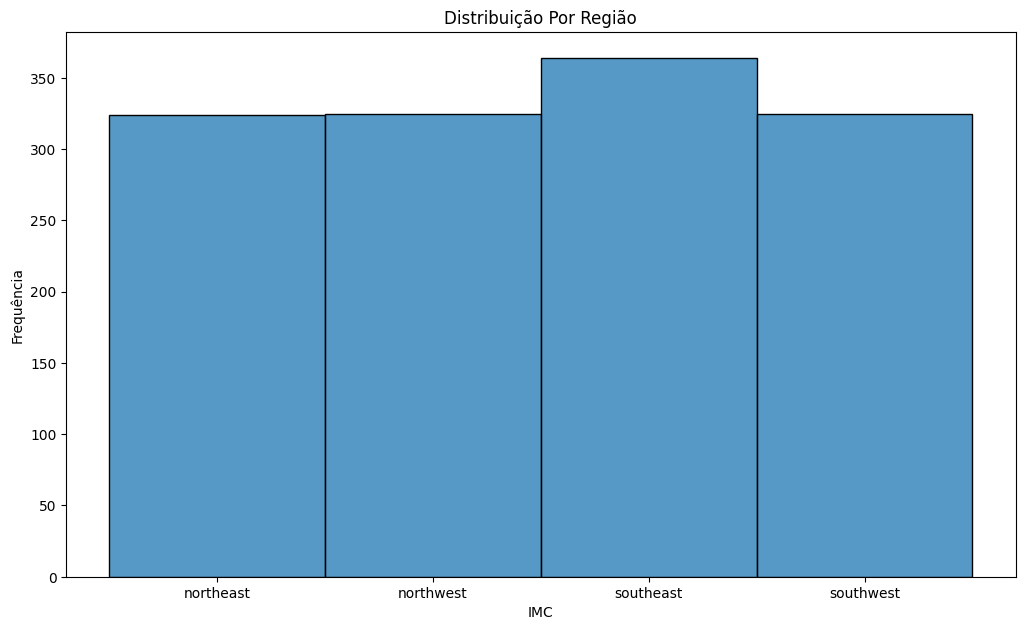

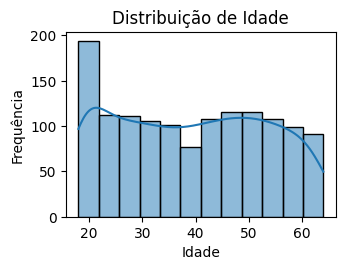

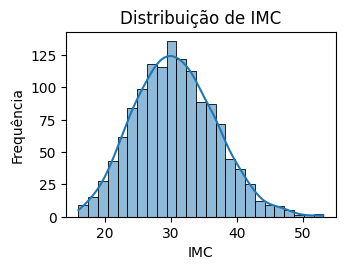

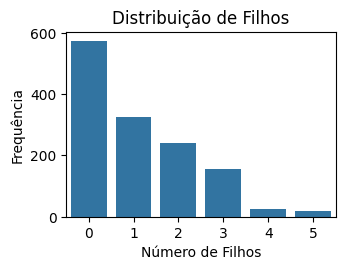

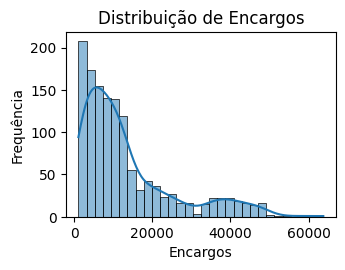

<Figure size 640x480 with 0 Axes>

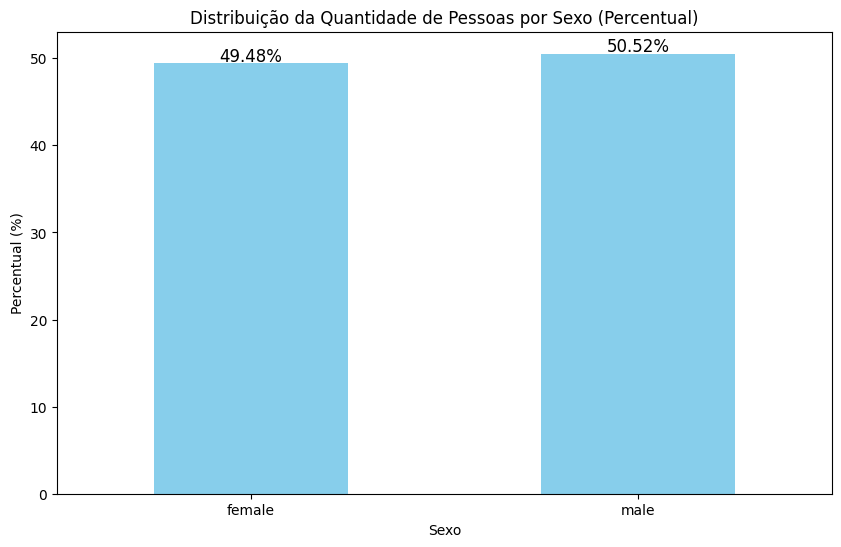

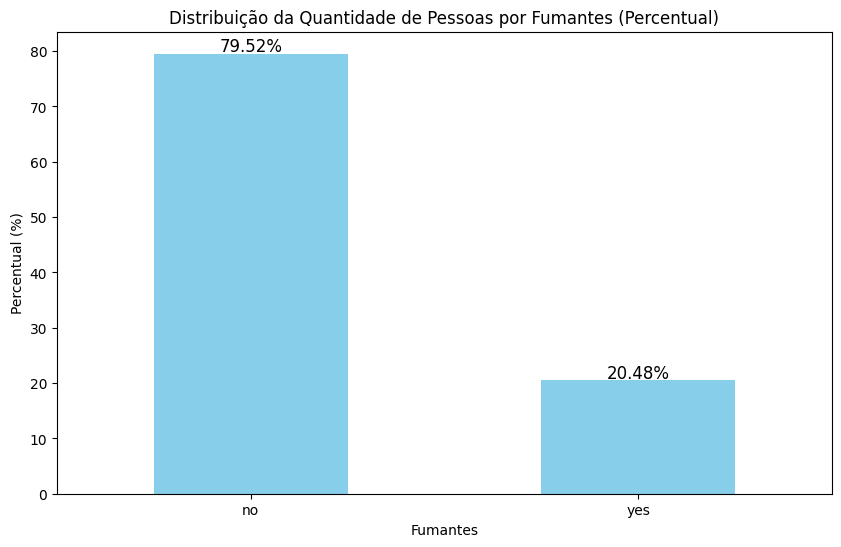

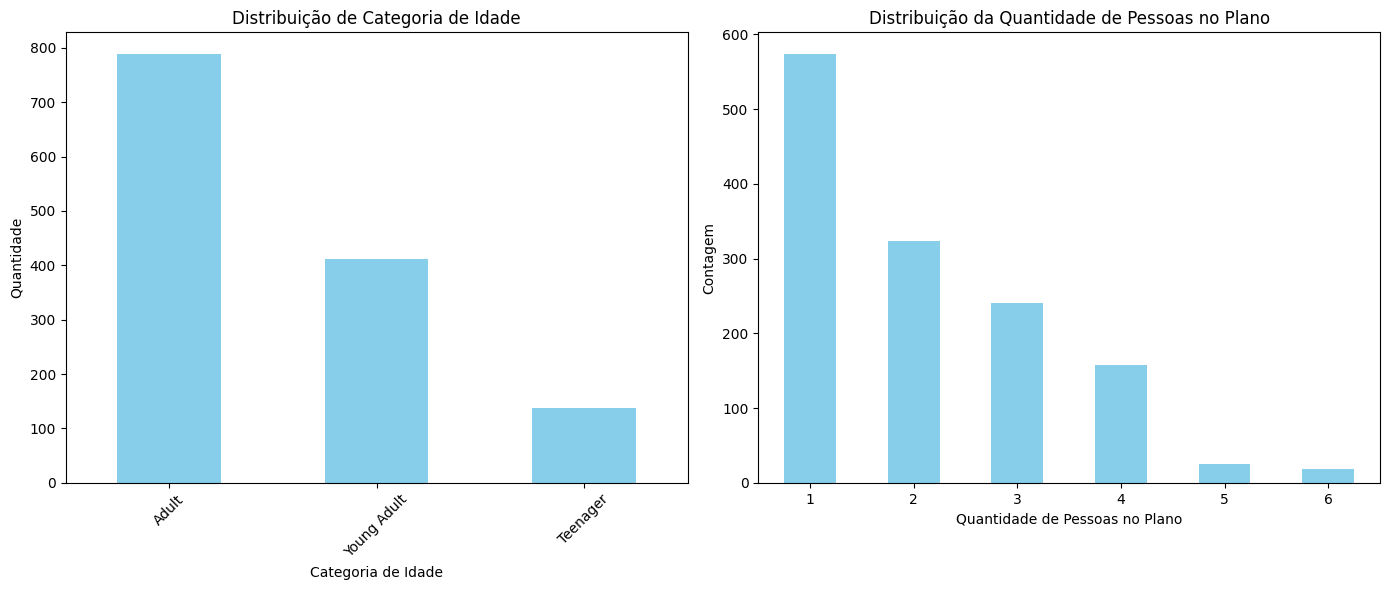

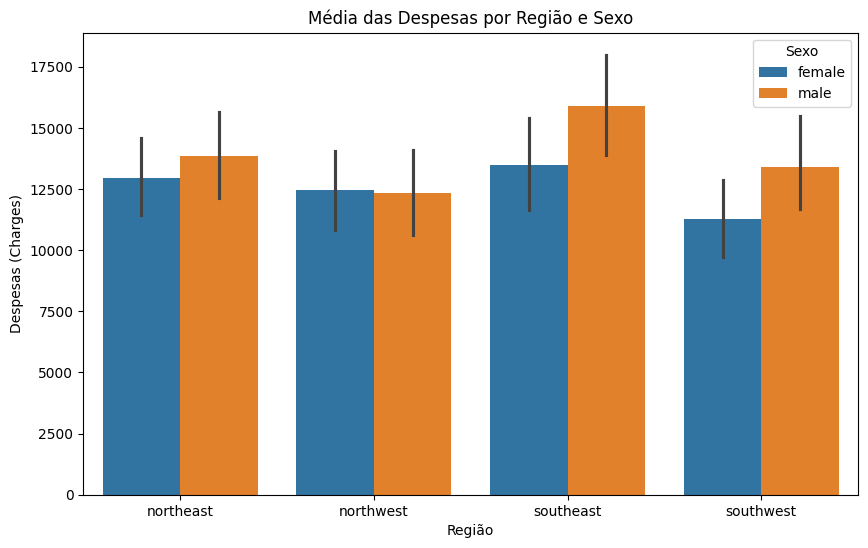

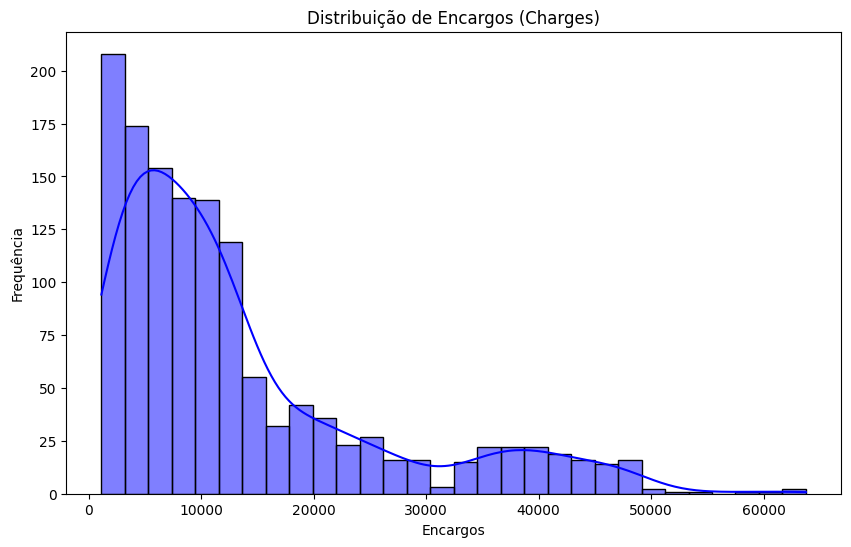

In [44]:
# Configurar o tamanho da figura e subplots
plt.figure(figsize=(20, 12))


# Distribuição de IMC
plt.subplot(2, 2, 2)
sns.histplot(df['region'])
plt.title('Distribuição Por Região')
plt.xlabel('IMC')
plt.ylabel('Frequência')

# Ajustar o layout
plt.tight_layout()
plt.show()

# Distribuição de Idade
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Ajustar o layout
plt.tight_layout()
plt.show()

# Distribuição de IMC
plt.subplot(2, 2, 2)
sns.histplot(df['bmi'], kde=True)
plt.title('Distribuição de IMC')
plt.xlabel('IMC')
plt.ylabel('Frequência')

# Ajustar o layout
plt.tight_layout()
plt.show()

# Distribuição de Filhos
plt.subplot(2, 2, 3)
sns.countplot(x='children', data=df)
plt.title('Distribuição de Filhos')
plt.xlabel('Número de Filhos')
plt.ylabel('Frequência')

# Ajustar o layout
plt.tight_layout()
plt.show()

# Distribuição de Encargos
plt.subplot(2, 2, 4)
sns.histplot(df['charges'], kde=True)
plt.title('Distribuição de Encargos')
plt.xlabel('Encargos')
plt.ylabel('Frequência')

# Ajustar o layout
plt.tight_layout()
plt.show()

# Ajustar o layout
plt.tight_layout()
plt.show()

# GRAFICO DE DISTRIBUIÇÃO DE SEXO - INICIO
# Calcular a contagem e percentual de cada categoria de sexo
sex_counts = df['sex'].value_counts().sort_index()
sex_percentages = (sex_counts / sex_counts.sum()) * 100

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = sex_percentages.plot(kind='bar', color='skyblue')

# Adicionar títulos e rótulos
plt.title('Distribuição da Quantidade de Pessoas por Sexo (Percentual)')
plt.xlabel('Sexo')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)

# Adicionar rótulos de percentual em cima das barras
for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.2f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords='offset points',
                 ha='center', va='center', fontsize=12, color='black')


# GRAFICO DE DISTRIBUIÇÃO DE SEXO - FIM
###############################################################################
###############################################################################


# GRAFICO DE DISTRIBUIÇÃO DE FUMANTES - INICIO
# Calcular a contagem e percentual de cada categoria de sexo
smoker_counts = df['smoker'].value_counts().sort_index()
smoker_percentages = (smoker_counts / smoker_counts.sum()) * 100

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
bars_smoker = smoker_percentages.plot(kind='bar', color='skyblue')

# Adicionar títulos e rótulos
plt.title('Distribuição da Quantidade de Pessoas por Fumantes (Percentual)')
plt.xlabel('Fumantes')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)

# Adicionar rótulos de percentual em cima das barras
for bar in bars_smoker.patches:
    plt.annotate(f'{bar.get_height():.2f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords='offset points',
                 ha='center', va='center', fontsize=12, color='black')

# Mostrar o gráfico
plt.show()

# GRAFICO DE DISTRIBUIÇÃO DE FUMANTES - FIM

# Plotar as distribuições de variáveis categóricas
plt.figure(figsize=(14, 6))

# Categoria de idade
plt.subplot(1, 2, 1)
df['age_category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribuição de Categoria de Idade')
plt.xlabel('Categoria de Idade')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

# Quantidade de pessoas no plano
plt.subplot(1, 2, 2)
df['number_people_on_plan'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribuição da Quantidade de Pessoas no Plano')
plt.xlabel('Quantidade de Pessoas no Plano')
plt.ylabel('Contagem')
plt.xticks(rotation=0)

# Ajustar o layout
plt.tight_layout()
plt.show()

# Gráfico de barras para média das despesas por região e sexo
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', hue='sex', data=df)

# Adicionar títulos e rótulos
plt.title('Média das Despesas por Região e Sexo')
plt.xlabel('Região')
plt.ylabel('Despesas (Charges)')
plt.legend(title='Sexo')

# Analisar a distribuição de 'charges'
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('Distribuição de Encargos (Charges)')
plt.xlabel('Encargos')
plt.ylabel('Frequência')

# Mostrar o gráfico
plt.show()

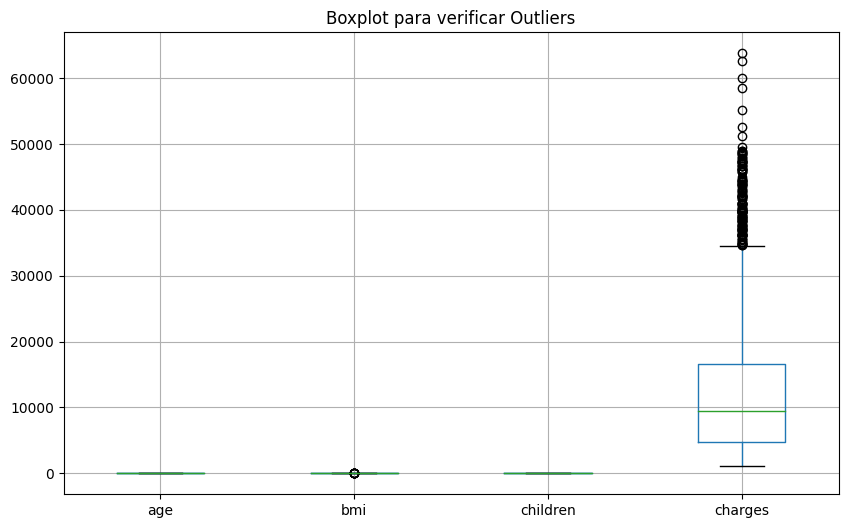

In [45]:
# Boxplot para verificar outliers
plt.figure(figsize=(10, 6))
df[['age', 'bmi', 'children', 'charges']].boxplot()
plt.title('Boxplot para verificar Outliers')
plt.show()

**Gerar a Correlação das Variáveis**

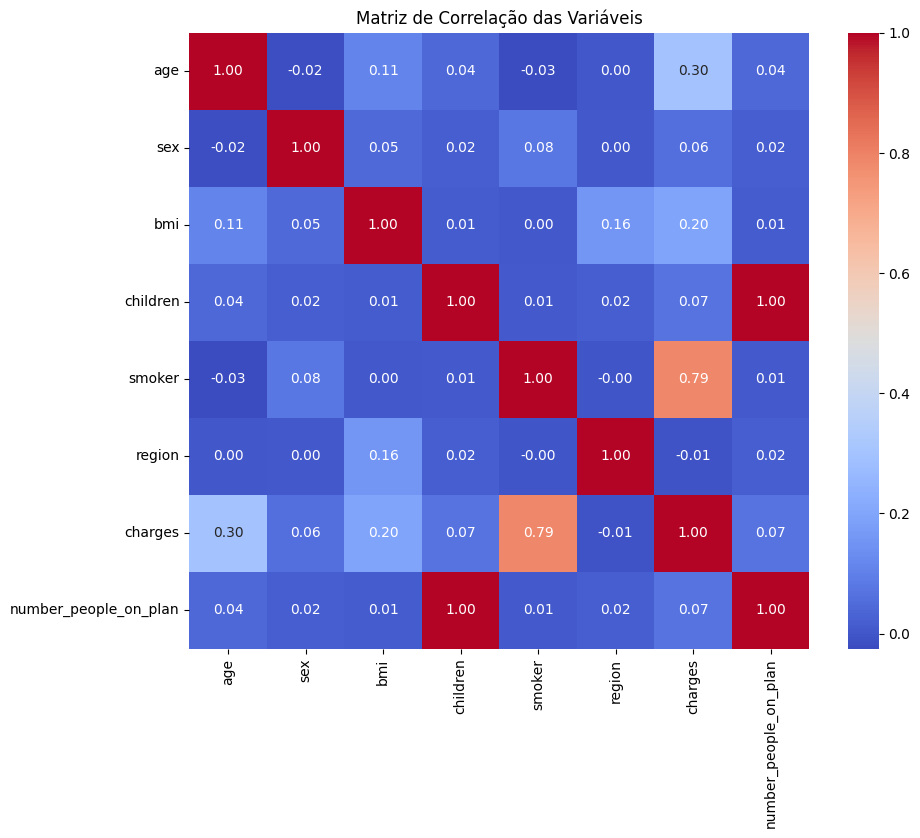

In [46]:

# Transformar a variavel categorica com o LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

# Criar um DataFrame a partir do dicionário
correlation_matrix = pd.DataFrame(corr_matriz, index=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'number_people_on_plan'])

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis')
plt.show()




## Pré Processamento

In [47]:
# Dados

df.head(10)

,age,sex,bmi,children,smoker,region,charges,age_category,number_people_on_plan
0,19,0,27.900,0,1,3,16884.92400,Teenager,1
1,18,1,33.770,1,0,2,1725.55230,Teenager,2
2,28,1,33.000,3,0,2,4449.46200,Young Adult,4
3,33,1,22.705,0,0,1,21984.47061,Young Adult,1
4,32,1,28.880,0,0,1,3866.85520,Young Adult,1
5,31,0,25.740,0,0,2,3756.62160,Young Adult,1
6,46,0,33.440,1,0,2,8240.58960,Adult,2
7,37,0,27.740,3,0,1,7281.50560,Adult,4
8,37,1,29.830,2,0,0,6406.41070,Adult,3
9,60,0,25.840,0,0,1,28923.13692,Adult,1


### Segue somente com o age numérico

In [48]:
# Gera Data Frame sem o age_category para testarmos como o modelo se comporta somente com o age numérico
df_age_num = df.drop(columns=['age_category'])
df_age_num

,age,sex,bmi,children,smoker,region,charges,number_people_on_plan
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,2
2,28,1,33.000,3,0,2,4449.46200,4
3,33,1,22.705,0,0,1,21984.47061,1
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,4
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,1


In [49]:
df# Importações

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [50]:
# Definir as variáveis preditoras e a variável alvo
X = df_age_num.drop('charges', axis=1)
y = df_age_num['charges']

In [51]:
# Codificar variáveis categóricas e padronizar variáveis numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'children']),
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'region'])
    ])

In [52]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'bmi', 'children']),
                                ('cat', OneHotEncoder(),
                                 ['sex', 'smoker', 'region'])])

In [53]:
# Aplicar a transformação nos dados
X_transformed = preprocessor.fit_transform(X)
X_transformed[0]


array([-1.43876426, -0.45332   , -0.90861367,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ])

In [54]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1070, 11), (268, 11), (1070,), (268,))

#### Treinamento
Utilizando Regressão e Random Forest

In [56]:
# Importações
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from IPython.display import display

In [57]:
# Instanciar os modelos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [58]:
# Treinar os modelos e avaliar
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2 Score': r2_score(y_test, y_pred)
    }

In [59]:
results_df = pd.DataFrame(results).T
display(results_df)

,RMSE,MAE,R2 Score
Linear Regression,5796.284659,4181.194474,0.783593
Random Forest,4588.158846,2540.993475,0.864403


In [60]:
!apt-get install -y graphviz
!pip install graphviz pydot


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
import graphviz

# Treinar o modelo Random Forest novamente para garantir consistência
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Extrair uma das árvores do modelo Random Forest
tree = rf_model.estimators_[0]

# Obter os nomes das características após a transformação
# Obtendo os nomes das características numéricas
numeric_feature_names = ['age', 'bmi', 'children']

# Obtendo os nomes das características categóricas após a transformação
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(['sex', 'smoker', 'region'])

# Combinar todos os nomes das características
all_feature_names = numeric_feature_names + list(categorical_feature_names)

# Exportar a árvore para o formato DOT
dot_data = export_graphviz(tree, out_file="tree.dot",
                           feature_names=all_feature_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Convertendo o arquivo .dot para .png
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")


### Segue somente com o age categórico

In [ ]:
# Gera Data Frame sem o age_category para testarmos como o modelo se comporta somente com o age numérico
df_age_cat = df.drop(columns=['age'])
df_age_cat

In [ ]:
# Definir as variáveis preditoras e a variável alvo
X = df_age_cat.drop('charges', axis=1)
y = df_age_cat['charges']

In [ ]:
# Codificar variáveis categóricas e padronizar variáveis numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['bmi', 'children']),
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'region', 'age_category'])
    ])

In [ ]:
preprocessor

In [ ]:
# Aplicar a transformação nos dados
X_transformed = preprocessor.fit_transform(X)
X_transformed[0]


In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


#### Treinamento
Utilizando Regressão e Random Forest

In [ ]:
# Instanciar os modelos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [ ]:
# Treinar os modelos e avaliar
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2 Score': r2_score(y_test, y_pred)
    }

In [ ]:
results_df = pd.DataFrame(results).T
display(results_df)

In [ ]:
!apt-get install -y graphviz
!pip install graphviz pydot


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
import graphviz

# Treinar o modelo Random Forest novamente para garantir consistência
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Extrair uma das árvores do modelo Random Forest
tree = rf_model.estimators_[0]

# Obter os nomes das características após a transformação
# Obtendo os nomes das características numéricas
numeric_feature_names = ['bmi', 'children']

# Obtendo os nomes das características categóricas após a transformação
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(['sex', 'smoker', 'region', 'age_category'])

# Combinar todos os nomes das características
all_feature_names = numeric_feature_names + list(categorical_feature_names)

# Exportar a árvore para o formato DOT
dot_data = export_graphviz(tree, out_file="tree_cat.dot",
                           feature_names=all_feature_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Convertendo o arquivo .dot para .png
(graph,) = pydot.graph_from_dot_file("tree_cat.dot")
graph.write_png("tree_cat.png")
